## <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 24px; color: #ffffff; font-weight: bold; padding: 12px; border-radius: 8px; background: linear-gradient(#2EA149, #1e3a8a, #4f46e5); text-align: right;"> تحلیل اکتشافی </div>


In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno

### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> خواندن دیتا </div>


In [70]:
df_ML=pd.read_csv('data_ML.csv')

In [71]:
df_ML

,Address,vehicle,motorcycle,bicycle,year,income,cost,trans_cost,real_income,real_cost,real_trans_cost
0,20003386609,False,False,True,1398,2.670000e+08,6.875200e+07,500000,6.480583e+06,1.668738e+06,12135.922330
1,20010394214,True,True,True,1398,1.448200e+09,1.921962e+08,2850000,3.515049e+07,4.664955e+06,69174.757282
2,20003387007,False,False,False,1398,6.760000e+07,3.683316e+07,1000000,1.640777e+06,8.940088e+05,24271.844660
3,20007392616,True,False,False,1398,1.800000e+08,8.704000e+07,1600000,4.368932e+06,2.112621e+06,38834.951456
4,20006390223,False,True,False,1398,3.216000e+08,4.056390e+08,200000,7.805825e+06,9.845607e+06,4854.368932
...,...,...,...,...,...,...,...,...,...,...,...
129336,13001373136,True,False,False,1401,5.230000e+09,1.293727e+09,9500000,1.124731e+08,2.782209e+07,204301.075269
129337,13001373138,True,False,False,1401,1.763980e+09,4.092450e+08,5200000,3.793505e+07,8.800968e+06,111827.956989
129338,13001370341,False,False,False,1401,1.897520e+09,1.559038e+08,4500000,4.080688e+07,3.352770e+06,96774.193548
129339,22104612941,False,False,False,1401,1.450200e+08,1.005710e+08,1000000,3.118710e+06,2.162817e+06,21505.376344


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> بررسی دیتا </div>


In [72]:
df_ML.describe()

,Address,year,income,cost,trans_cost,real_income,real_cost,real_trans_cost
count,1.293410e+05,129341.00000,1.111720e+05,1.293410e+05,1.293410e+05,1.111720e+05,1.293410e+05,1.293410e+05
mean,1.589392e+10,1399.45605,1.073183e+09,2.321505e+08,2.223930e+06,2.342904e+07,5.092549e+06,4.884229e+04
std,5.003648e+09,1.15155,3.690605e+09,7.777064e+08,3.461306e+06,7.970675e+07,1.681638e+07,7.491671e+04
min,1.000100e+10,1398.00000,0.000000e+00,1.574388e+06,1.500000e+04,0.000000e+00,3.342650e+04,3.184713e+02
25%,1.140217e+10,1398.00000,2.420000e+08,4.674900e+07,6.250000e+05,5.526680e+06,1.040467e+06,1.456311e+04
50%,1.270834e+10,1399.00000,4.713500e+08,1.041320e+08,1.350000e+06,1.045696e+07,2.318074e+06,3.010753e+04
75%,2.120253e+10,1401.00000,1.042010e+09,2.276995e+08,2.700000e+06,2.282475e+07,5.009462e+06,6.019417e+04
max,2.300671e+10,1401.00000,5.405600e+11,8.139410e+10,3.386000e+08,1.162495e+10,1.750411e+09,7.188960e+06


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> عددی کردن ستون های وسایل نقلیه</div>


In [73]:

bool_cols = ['vehicle', 'motorcycle', 'bicycle']  

for col in bool_cols:
    df_ML[col] = df_ML[col].astype(int)


print(df_ML.head())


       Address  vehicle  motorcycle  bicycle  year        income         cost  \
0  20003386609        0           0        1  1398  2.670000e+08   68752000.0   
1  20010394214        1           1        1  1398  1.448200e+09  192196164.0   
2  20003387007        0           0        0  1398  6.760000e+07   36833164.0   
3  20007392616        1           0        0  1398  1.800000e+08   87040000.0   
4  20006390223        0           1        0  1398  3.216000e+08  405639000.0   

   trans_cost   real_income     real_cost  real_trans_cost  
0      500000  6.480583e+06  1.668738e+06     12135.922330  
1     2850000  3.515049e+07  4.664955e+06     69174.757282  
2     1000000  1.640777e+06  8.940088e+05     24271.844660  
3     1600000  4.368932e+06  2.112621e+06     38834.951456  
4      200000  7.805825e+06  9.845607e+06      4854.368932  


## <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 24px; color: #ffffff; font-weight: bold; padding: 12px; border-radius: 8px; background: linear-gradient(#2EA149, #1e3a8a, #4f46e5); text-align: right;"> نمودارها</div>


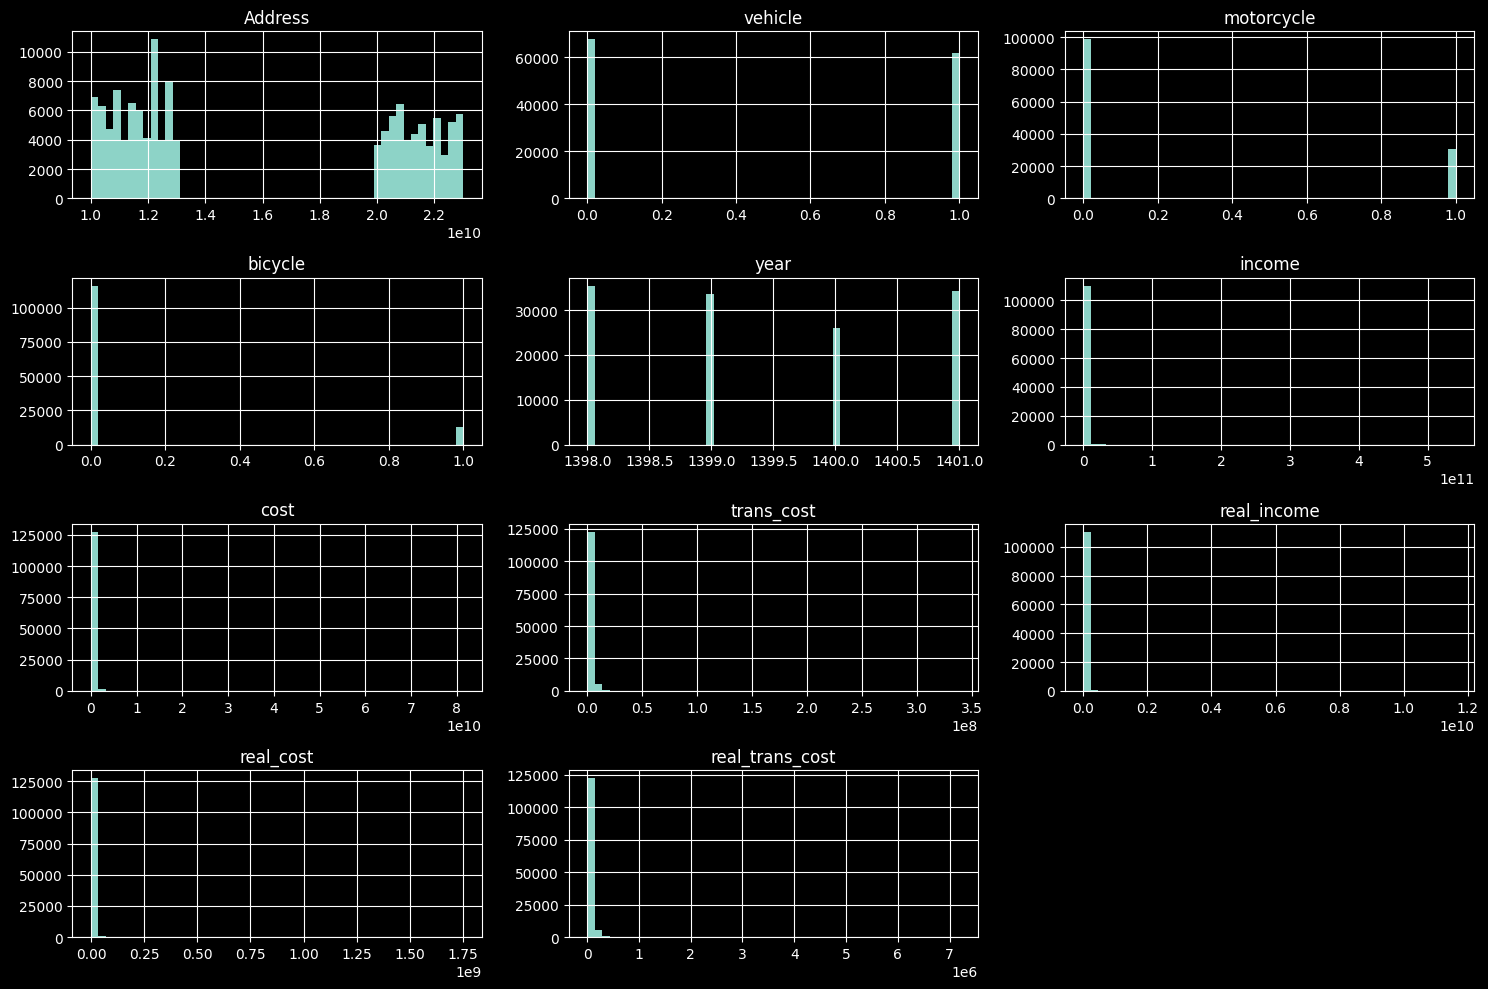

In [74]:
#plotting histogram to see distribution
df_ML.hist(bins=50, figsize=(15, 10))
plt.tight_layout()
plt.show()


<div style="direction: rtl; text-align: right; font-family: 'Vazir', sans-serif; background-color: #2c3e50; padding: 20px; border-radius: 8px; box-shadow: 0px 0px 10px rgba(0,0,0,0.3); color: #ecf0f1;">
  <h2 style="color: #f1c40f; text-align: center;">تحلیل نمودارها</h2>
  
  <p style="font-size: 16px; line-height: 1.6;">
    در این تحلیل، نمودارهای مختلفی که به ویژگی‌های متفاوتی از داده‌ها اشاره می‌کنند، بررسی شده‌اند. هر نمودار نمایانگر یکی از جنبه‌های مهم داده‌ها از جمله وسیله نقلیه، سال، درآمد، و هزینه است. نتایج این تحلیل به شرح زیر است:
  </p>
  
  <ul style="font-size: 16px; line-height: 1.8;">
    <li><strong>نمودار آدرس:</strong> داده‌ها در محدوده‌های خاصی از آدرس‌ها متمرکز شده‌اند و الگوی پراکندگی نرمال دیده نمی‌شود.</li>
    <li><strong>نمودار وسیله نقلیه:</strong> داده‌ها به صورت باینری (0 و 1) بوده و نشان‌دهنده حضور یا عدم حضور وسیله نقلیه در این داده‌ها هستند.</li>
    <li><strong>نمودار موتورسیکلت:</strong> مانند نمودار وسیله نقلیه، بیشتر داده‌ها در مقدار 0 متمرکز هستند که به معنای استفاده کم از موتورسیکلت است.</li>
    <li><strong>نمودار دوچرخه:</strong> تعداد کمی از داده‌ها در مقدار 1 هستند، نشان‌دهنده استفاده محدود از دوچرخه.</li>
    <li><strong>نمودار درآمد:</strong> بیشتر داده‌ها در مقادیر کم متمرکز شده‌اند اما برخی مقادیر بسیار بالایی نیز وجود دارد که نشان‌دهنده نابرابری اقتصادی است.</li>
    <li><strong>نمودار هزینه:</strong> هزینه‌ها بیشتر در مقادیر پایین متمرکز هستند، با تعدادی داده‌های پراکنده در مقادیر بالا.</li>
  </ul>

  <h3 style="color: #2ecc71;">تحلیل کلی:</h3>
  
  <p style="font-size: 16px; line-height: 1.6;">
    الگوی کلی نشان می‌دهد که بیشتر داده‌ها در مقادیر پایین متمرکز شده‌اند. به خصوص در نمودارهای مربوط به هزینه و درآمد، بیشتر مقادیر در نزدیک صفر بوده و نشان‌دهنده پراکندگی کم داده‌ها است. اما برخی مقادیر بسیار بالا می‌توانند نمایانگر عدم توازن یا نابرابری در داده‌ها باشند.
  </p>


  <p style="font-size: 16px; line-height: 1.6; color: #27ae60;">
    در نهایت، نتایج تحلیل نشان می‌دهد که ناهماهنگی‌هایی در داده‌ها وجود دارد و در برخی دسته‌ها مانند درآمد و هزینه، توزیع داده‌ها نشان‌دهنده اختلافات اقتصادی مهمی است.
  </p>
</div>


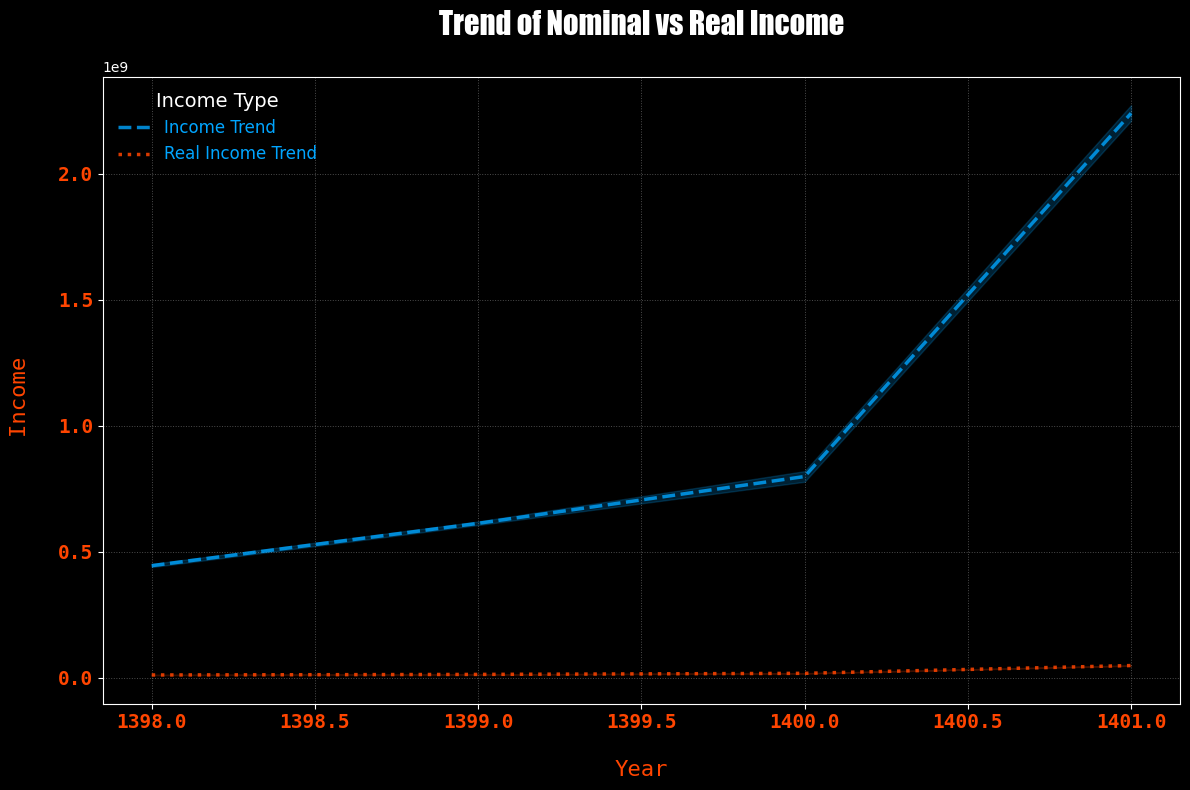

In [75]:
# Calculating the rolling averages for income trends
df_ML['income_trend'] = df_ML['income'].rolling(window=5).mean()
df_ML['real_income_trend'] = df_ML['real_income'].rolling(window=5).mean()

# dark backg
plt.style.use('dark_background')


plt.figure(figsize=(12, 8))


sns.lineplot(x=df_ML['year'], y=df_ML['income_trend'], label='Income Trend', color='#00A5FF', linewidth=2.5, linestyle='--', alpha=0.8)
sns.lineplot(x=df_ML['year'], y=df_ML['real_income_trend'], label='Real Income Trend', color='#FF4500', linewidth=2.5, linestyle=':', alpha=0.85)


plt.title('Trend of Nominal vs Real Income', fontsize=22, color='#FFFFFF', weight='bold', pad=30, fontfamily='fantasy')
plt.xlabel('Year', fontsize=16, color='#FF4500', fontfamily='monospace', labelpad=20)
plt.ylabel('Income ', fontsize=16, color='#FF4500', fontfamily='monospace', labelpad=20)

#Adding legend
plt.legend(title='Income Type', title_fontsize='14', fontsize='12', loc='upper left', frameon=False, facecolor='none', edgecolor='none', labelcolor='#00A5FF')

plt.xticks(fontsize=14, color='#FF4500', weight='bold', fontfamily='monospace')
plt.yticks(fontsize=14, color='#FF4500', weight='bold', fontfamily='monospace')


plt.grid(True, which='both', linestyle=':', linewidth=0.7, color='#FFFFFF', alpha=0.3)
plt.gca().patch.set_alpha(0)

plt.tight_layout()
plt.show()


<div style="direction: rtl; text-align: right; font-family: 'Vazir', sans-serif; background-color: #2c3e50; padding: 20px; border-radius: 8px; box-shadow: 0px 0px 10px rgba(0,0,0,0.3); color: #ecf0f1;">
  <h2 style="color: #f1c40f; text-align: center;">تحلیل روند درآمد اسمی و حقیقی</h2>
  
  <p style="font-size: 16px; line-height: 1.6;">
    نمودار فوق روند درآمد اسمی و حقیقی را طی سال‌های ۱۳۹۸ تا ۱۴۰۱ به تصویر می‌کشد. این دو شاخص به وضوح در نمودار با استفاده از خطوط متفاوت نمایش داده شده‌اند. خط آبی نشان‌دهنده درآمد اسمی و خط نارنجی نقطه‌چین، روند درآمد حقیقی را نمایش می‌دهد. در این تحلیل، نکات زیر به چشم می‌خورد:
  </p>
  
  <ul style="font-size: 16px; line-height: 1.8;">
    <li><strong>روند درآمد اسمی:</strong> درآمد اسمی طی سال‌های مذکور به تدریج افزایش یافته است و در سال ۱۴۰۰ جهش بزرگی در مقدار آن مشاهده می‌شود.</li>
    <li><strong>روند درآمد حقیقی:</strong> درآمد حقیقی به شکل قابل توجهی ثابت باقی مانده است و تغییرات چشمگیری در این شاخص دیده نمی‌شود. این موضوع نشان‌دهنده تورم و کاهش قدرت خرید حقیقی است، که با وجود افزایش درآمد اسمی، اثرات تورم بر کاهش ارزش پول جبران نشده است.</li>
  </ul>

  <h3 style="color: #2ecc71;">تحلیل کلی:</h3>
  
  <p style="font-size: 16px; line-height: 1.6;">
    افزایش درآمد اسمی با توجه به نمودار کاملاً مشخص است، اما این افزایش درآمد نتوانسته تأثیر مثبتی بر قدرت خرید و درآمد حقیقی داشته باشد. ثابت ماندن درآمد حقیقی بیانگر این است که تورم موجود، قدرت خرید افراد را تحت تاثیر قرار داده و رشد درآمدها تنها در ظاهر بوده است.
  </p>

  <p style="font-size: 16px; line-height: 1.6; color: #27ae60;">
    در مجموع، نتیجه‌گیری می‌شود که در طول این دوره زمانی، با وجود افزایش محسوس درآمد اسمی، درآمد حقیقی تغییرات مهمی نداشته و این موضوع نشان‌دهنده چالش‌های اقتصادی در ارتباط با تورم است.
  </p>
</div>


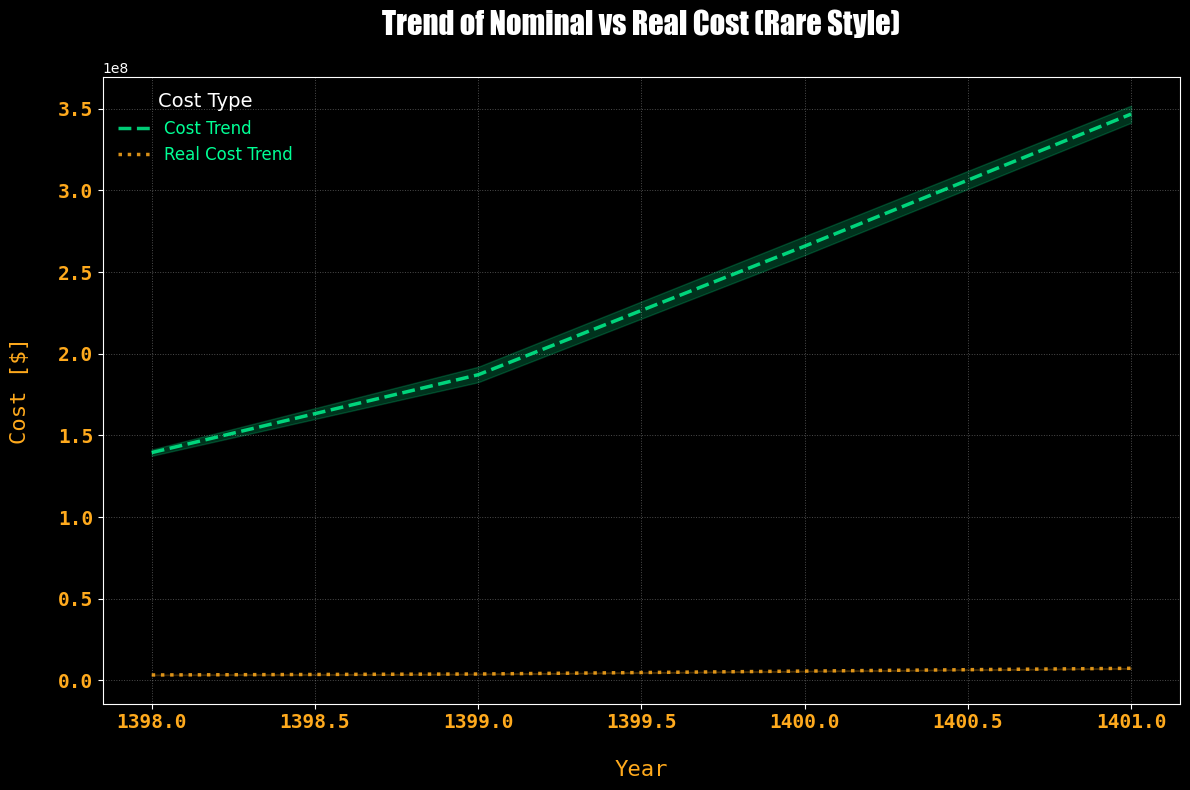

In [76]:
# Calculating the rolling averages for cost trends
df_ML['cost_trend'] = df_ML['cost'].rolling(window=5).mean()
df_ML['real_cost_trend'] = df_ML['real_cost'].rolling(window=5).mean()

# dark bckg
plt.style.use('dark_background')
plt.figure(figsize=(12, 8))

#line plots
sns.lineplot(x=df_ML['year'], y=df_ML['cost_trend'], label='Cost Trend', color='#00FF95', linewidth=2.5, linestyle='--', alpha=0.8)
sns.lineplot(x=df_ML['year'], y=df_ML['real_cost_trend'], label='Real Cost Trend', color='#FFAA1D', linewidth=2.5, linestyle=':', alpha=0.85)

plt.title('Trend of Nominal vs Real Cost (Rare Style)', fontsize=22, color='#FFFFFF', weight='bold', pad=30, fontfamily='fantasy')
plt.xlabel('Year', fontsize=16, color='#FFAA1D', fontfamily='monospace', labelpad=20)
plt.ylabel('Cost [$]', fontsize=16, color='#FFAA1D', fontfamily='monospace', labelpad=20)

# Adding legend
plt.legend(title='Cost Type', title_fontsize='14', fontsize='12', loc='upper left', frameon=False, facecolor='none', edgecolor='none', labelcolor='#00FF95')

plt.xticks(fontsize=14, color='#FFAA1D', weight='bold', fontfamily='monospace')
plt.yticks(fontsize=14, color='#FFAA1D', weight='bold', fontfamily='monospace')

plt.grid(True, which='both', linestyle=':', linewidth=0.7, color='#FFFFFF', alpha=0.3)
plt.gca().patch.set_alpha(0)


plt.tight_layout()

plt.show()


<div style="direction: rtl; text-align: right; font-family: 'Vazir', sans-serif; background-color: #2c3e50; padding: 20px; border-radius: 8px; box-shadow: 0px 0px 10px rgba(0,0,0,0.3); color: #ecf0f1;">
  <h2 style="color: #f1c40f; text-align: center;">تحلیل روند هزینه اسمی و حقیقی</h2>
  
  <p style="font-size: 16px; line-height: 1.6;">
     خط سبز نشان‌دهنده روند هزینه اسمی و خط نارنجی نقطه‌چین روند هزینه حقیقی را به تصویر می‌کشد. در این تحلیل، نکات زیر حائز اهمیت است:
  </p>
  
  <ul style="font-size: 16px; line-height: 1.8;">
    <li><strong>روند هزینه اسمی:</strong> در طول سال‌های ۱۳۹۸ تا ۱۴۰۱، هزینه‌های اسمی به صورت تدریجی افزایش یافته است و در نهایت در سال ۱۴۰۱ به اوج خود رسیده است. این افزایش می‌تواند ناشی از افزایش قیمت‌ها و تورم باشد.</li>
    <li><strong>روند هزینه حقیقی:</strong> مشابه با درآمد حقیقی، هزینه حقیقی نیز ثابت مانده و تغییر چندانی نداشته است. این موضوع می‌تواند نشان‌دهنده تأثیرات تورم بر هزینه‌های حقیقی باشد که قدرت خرید افراد را کاهش داده است.</li>
  </ul>

  <h3 style="color: #2ecc71;">تحلیل کلی:</h3>
  
  <p style="font-size: 16px; line-height: 1.6;">
    با افزایش تدریجی هزینه‌های اسمی طی این دوره، به نظر می‌رسد که قدرت خرید و هزینه‌های حقیقی مردم تغییر چندانی نداشته و تورم تأثیر مهمی در این زمینه داشته است. این روند نشان می‌دهد که با وجود افزایش هزینه‌ها، هزینه حقیقی همانند درآمد حقیقی ثابت مانده و تغییرات اسمی تنها در ظاهر بوده است.
  </p>

  <p style="font-size: 16px; line-height: 1.6; color: #27ae60;">
    در مجموع، نتیجه این نمودار نشان‌دهنده تأثیرات اقتصادی تورم بر هزینه‌ها است که باعث شده افزایش هزینه‌های اسمی تأثیری بر هزینه‌های حقیقی نگذارد.
  </p>
</div>


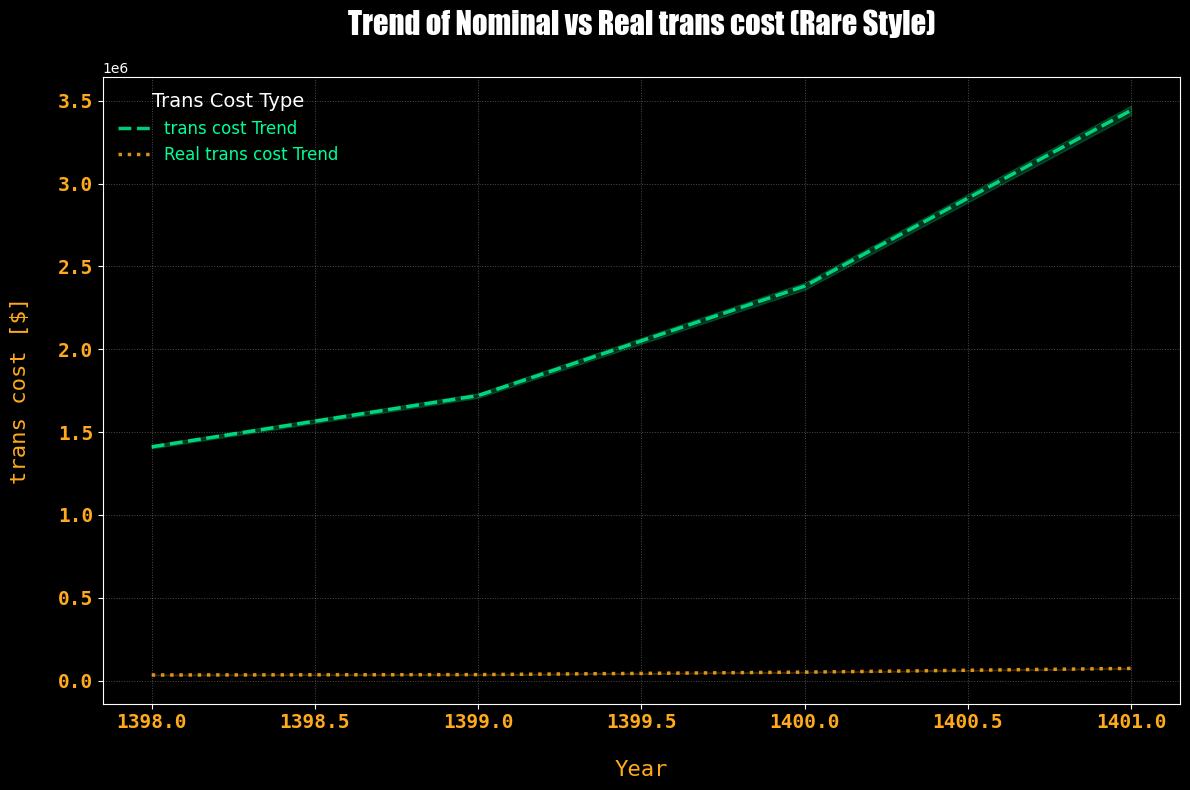

In [77]:
# Calculating the rolling averages for trans cost trends
df_ML['trans_cost_trend'] = df_ML['trans_cost'].rolling(window=5).mean()
df_ML['real_trans_cost_trend'] = df_ML['real_trans_cost'].rolling(window=5).mean()

# dark backg
plt.style.use('dark_background')


plt.figure(figsize=(12, 8))
sns.lineplot(x=df_ML['year'], y=df_ML['trans_cost_trend'], label='trans cost Trend', color='#00FF95', linewidth=2.5, linestyle='--', alpha=0.8)
sns.lineplot(x=df_ML['year'], y=df_ML['real_trans_cost_trend'], label='Real trans cost Trend', color='#FFAA1D', linewidth=2.5, linestyle=':', alpha=0.85)

plt.title('Trend of Nominal vs Real trans cost (Rare Style)', fontsize=22, color='#FFFFFF', weight='bold', pad=30, fontfamily='fantasy')
plt.xlabel('Year', fontsize=16, color='#FFAA1D', fontfamily='monospace', labelpad=20)
plt.ylabel('trans cost [$]', fontsize=16, color='#FFAA1D', fontfamily='monospace', labelpad=20)

# Adding legend
plt.legend(title='Trans Cost Type', title_fontsize='14', fontsize='12', loc='upper left', frameon=False, facecolor='none', edgecolor='none', labelcolor='#00FF95')

plt.xticks(fontsize=14, color='#FFAA1D', weight='bold', fontfamily='monospace')
plt.yticks(fontsize=14, color='#FFAA1D', weight='bold', fontfamily='monospace')

plt.grid(True, which='both', linestyle=':', linewidth=0.7, color='#FFFFFF', alpha=0.3)

plt.gca().patch.set_alpha(0)
plt.tight_layout()


plt.show()


<div style="direction: rtl; text-align: right; font-family: 'Vazir', sans-serif; background-color: #2c3e50; padding: 20px; border-radius: 8px; box-shadow: 0px 0px 10px rgba(0,0,0,0.3); color: #ecf0f1;">
  <h2 style="color: #f1c40f; text-align: center;"> تحلیل روند هزینه اسمی و حقیقی حمل و نقل</h2>
  
  <p style="font-size: 16px; line-height: 1.6;">
     خط سبز نشان‌دهنده روند هزینه اسمی حمل‌و‌نقل و خط نارنجی نقطه‌ چین روند هزینه حقیقی حمل‌و‌نقل را به تصویر می‌کشد. در این تحلیل، نکات زیر حائز اهمیت است:
  </p>
  
  <ul style="font-size: 16px; line-height: 1.8;">
    <li><strong>روند هزینه اسمی حمل‌و‌نقل:</strong> در طول سال‌های ۱۳۹۸ تا ۱۴۰۱، هزینه‌های اسمی حمل‌و‌نقل به صورت تدریجی افزایش یافته است و در نهایت در سال ۱۴۰۱ به اوج خود رسیده است. این افزایش می‌تواند ناشی از افزایش قیمت‌ها و تورم باشد.</li>
    <li><strong>روند هزینه حقیقی حمل‌و‌نقل:</strong> مشابه با درآمد حقیقی، هزینه حقیقی نیز ثابت مانده و تغییر چندانی نداشته است. این موضوع می‌تواند نشان‌دهنده تأثیرات تورم بر هزینه‌های حقیقی باشد که قدرت خرید افراد را کاهش داده است.</li>
  </ul>

  <h3 style="color: #2ecc71;">تحلیل کلی:</h3>
  
  <p style="font-size: 16px; line-height: 1.6;">
    با افزایش تدریجی هزینه‌های اسمی حمل‌و‌نقل طی این دوره، به نظر می‌رسد که قدرت خرید و هزینه‌های حقیقی حمل‌و‌نقل مردم تغییر چندانی نداشته و تورم تأثیر مهمی در این زمینه داشته است. این روند نشان می‌دهد که با وجود افزایش هزینه‌ها، هزینه حقیقی همانند درآمد حقیقی ثابت مانده و تغییرات اسمی تنها در ظاهر بوده است.
  </p>

  <p style="font-size: 16px; line-height: 1.6; color: #27ae60;">
    در مجموع، نتیجه این نمودار نشان‌دهنده تأثیرات اقتصادی تورم بر هزینه‌ها است که باعث شده افزایش هزینه‌های اسمی تأثیری بر هزینه‌های حقیقی نگذارد.
  </p>
</div>


In [78]:
df_ML.columns

Index(['Address', 'vehicle', 'motorcycle', 'bicycle', 'year', 'income', 'cost',
       'trans_cost', 'real_income', 'real_cost', 'real_trans_cost',
       'income_trend', 'real_income_trend', 'cost_trend', 'real_cost_trend',
       'trans_cost_trend', 'real_trans_cost_trend'],
      dtype='object')

In [79]:
df_ML.drop([
       'income_trend', 'real_income_trend', 'cost_trend', 'real_cost_trend',
       'real_cost_trend'],axis=1, inplace=True)

In [80]:
df_ML

,Address,vehicle,motorcycle,bicycle,year,income,cost,trans_cost,real_income,real_cost,real_trans_cost,trans_cost_trend,real_trans_cost_trend
0,20003386609,0,0,1,1398,2.670000e+08,6.875200e+07,500000,6.480583e+06,1.668738e+06,12135.922330,NaN,NaN
1,20010394214,1,1,1,1398,1.448200e+09,1.921962e+08,2850000,3.515049e+07,4.664955e+06,69174.757282,NaN,NaN
2,20003387007,0,0,0,1398,6.760000e+07,3.683316e+07,1000000,1.640777e+06,8.940088e+05,24271.844660,NaN,NaN
3,20007392616,1,0,0,1398,1.800000e+08,8.704000e+07,1600000,4.368932e+06,2.112621e+06,38834.951456,NaN,NaN
4,20006390223,0,1,0,1398,3.216000e+08,4.056390e+08,200000,7.805825e+06,9.845607e+06,4854.368932,1230000.0,29854.368932
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129336,13001373136,1,0,0,1401,5.230000e+09,1.293727e+09,9500000,1.124731e+08,2.782209e+07,204301.075269,11440000.0,246021.505376
129337,13001373138,1,0,0,1401,1.763980e+09,4.092450e+08,5200000,3.793505e+07,8.800968e+06,111827.956989,11680000.0,251182.795699
129338,13001370341,0,0,0,1401,1.897520e+09,1.559038e+08,4500000,4.080688e+07,3.352770e+06,96774.193548,11080000.0,238279.569892
129339,22104612941,0,0,0,1401,1.450200e+08,1.005710e+08,1000000,3.118710e+06,2.162817e+06,21505.376344,8120000.0,174623.655914


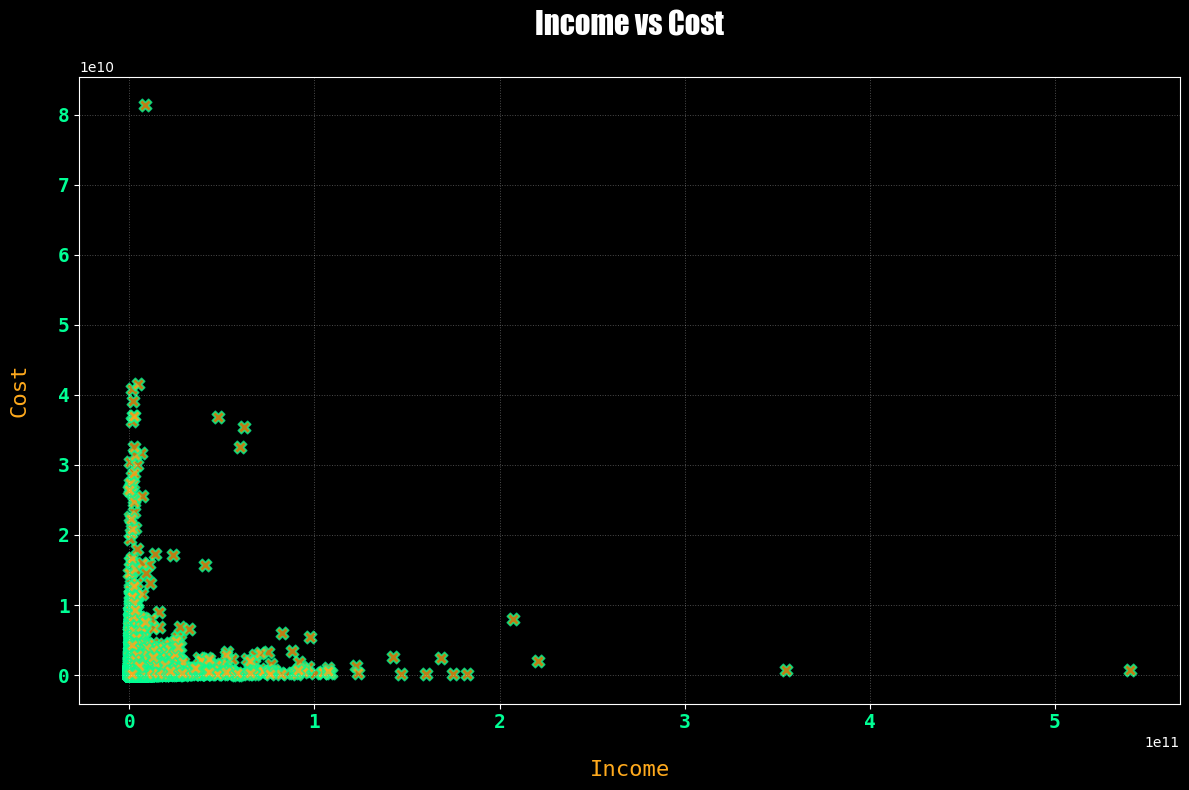

In [81]:

# dشrk backg
plt.style.use('dark_background')


plt.figure(figsize=(12, 8))

sns.scatterplot(
    x='income', y='cost', data=df_ML, 
    s=80, marker='X', color='#FFAA1D', 
    edgecolor='#00FF95', linewidth=1.2, alpha=0.75  
)


plt.title('Income vs Cost', fontsize=22, color='#FFFFFF', weight='bold', pad=30, fontfamily='fantasy')
plt.xlabel('Income', fontsize=16, color='#FFAA1D', fontfamily='monospace', labelpad=20)
plt.ylabel('Cost', fontsize=16, color='#FFAA1D', fontfamily='monospace', labelpad=20)

plt.grid(True, which='both', linestyle=':', linewidth=0.7, color='#FFFFFF', alpha=0.3)

plt.xticks(fontsize=14, color='#00FF95', weight='bold', fontfamily='monospace')
plt.yticks(fontsize=14, color='#00FF95', weight='bold', fontfamily='monospace')


plt.gca().patch.set_alpha(0) 
plt.tight_layout()
plt.show()


<div style="direction: rtl; text-align: right; font-family: 'Vazir', sans-serif; background-color: #2c3e50; padding: 20px; border-radius: 8px; box-shadow: 0px 0px 10px rgba(0,0,0,0.3); color: #ecf0f1;"> <h2 style="color: #f1c40f; text-align: center;">تحلیل ارتباط بین درآمد و هزینه</h2> <p style="font-size: 16px; line-height: 1.6;"> این نمودار پراکندگی رابطه بین <strong>درآمد</strong> و <strong>هزینه</strong> را به تصویر می‌کشد. با مشاهده داده‌ها می‌توان نتایج زیر را استخراج کرد: </p> <ul style="font-size: 16px; line-height: 1.8;"> <li><strong>تمرکز داده‌ها در مقادیر پایین درآمد:</strong> بخش عمده‌ای از داده‌ها در محدوده درآمدهای پایین (زیر 1e10) متمرکز شده‌اند و نشان می‌دهد که در این سطح، هزینه‌ها دارای مقادیر مختلفی هستند. این می‌تواند ناشی از تفاوت در ساختار هزینه برای درآمدهای کمتر باشد.</li> <li><strong>رابطه ضعیف بین درآمد و هزینه:</strong> به نظر می‌رسد که رابطه مشخص و مستقیمی بین افزایش درآمد و هزینه وجود ندارد. بسیاری از نقاط نشان‌دهنده این هستند که با افزایش درآمد، هزینه‌ها لزوماً افزایش نمی‌یابند و حتی در بعضی موارد، هزینه‌ها کاهش می‌یابند یا ثابت می‌مانند.</li> <li><strong>پراکندگی زیاد در محدوده‌های پایین:</strong> برای درآمدهای کمتر، پراکندگی زیادی در هزینه‌ها وجود دارد که نشان‌دهنده پیچیدگی و تفاوت در مدیریت هزینه‌ها است. این ممکن است به دلیل عوامل متعدد اقتصادی،</li> </ul> <h3 style="color: #2ecc71;">تحلیل کلی:</h3> <p style="font-size: 16px; line-height: 1.6;"> با توجه به داده‌های این نمودار، می‌توان گفت که هیچ الگوی ساده‌ای از ارتباط مستقیم بین درآمد و هزینه‌ها وجود ندارد. در درآمدهای پایین‌تر، هزینه‌ها بسیار پراکنده و متنوع هستند، در حالی که در درآمدهای بالاتر، داده‌ها کمتر شده و هزینه‌ها نسبتاً پایدارتر هستند. این تحلیل نشان می‌دهد که عوامل دیگری ممکن است در رابطه بین درآمد و هزینه دخیل باشند که فراتر از خود درآمد است. </p> <p style="font-size: 16px; line-height: 1.6; color: #27ae60;"> نتیجه کلی این تحلیل این است که هرچند انتظار می‌رود با افزایش درآمد، هزینه‌ها نیز افزایش یابند، اما این نمودار نشان می‌دهد که این رابطه همیشه ثابت نیست و ممکن است تحت تأثیر عوامل دیگری قرار گیرد. </p> </div>

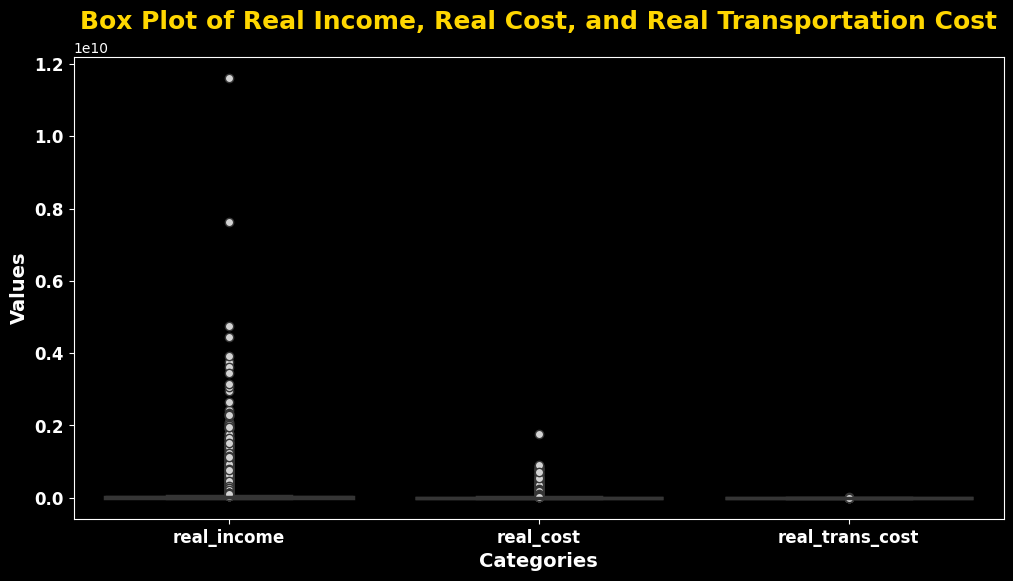

In [82]:

# dark backg
plt.style.use('dark_background')
plt.figure(figsize=(12, 6))

#scatters style
flierprops = dict(marker='o', markerfacecolor='lightgrey', markersize=6, linestyle='none')

sns.boxplot(data=df_ML[['real_income', 'real_cost', 'real_trans_cost']],
            palette="viridis", linewidth=2.5, fliersize=6,flierprops=flierprops)

plt.title('Box Plot of Real Income, Real Cost, and Real Transportation Cost', 
          fontsize=18, color='#FFD700', weight='bold', pad=20)
plt.xlabel('Categories', fontsize=14, color='#FFFFFF', weight='bold')
plt.ylabel('Values', fontsize=14, color='#FFFFFF', weight='bold')


plt.xticks(fontsize=12, color='#FFFFFF', weight='bold')
plt.yticks(fontsize=12, color='#FFFFFF', weight='bold')

plt.show()

<div style="direction: rtl; text-align: right; font-family: 'Vazir', sans-serif; background-color: #2c3e50; padding: 20px; border-radius: 8px; box-shadow: 0px 0px 10px rgba(0,0,0,0.3); color: #ecf0f1;">
  <h2 style="color: #f1c40f; text-align: center;"> تحلیل توزیع درآمد حقیفی و مجموع هزینه های حقیقی و هزینه های حقیقی حمل‌و‌نقل</h2>
  

  
  <ul style="font-size: 16px; line-height: 1.8;">
    <li><strong>توزیع درآمد حقیقی:</strong>درآمد حقیقی خانوارها در بازه وسیعی قرار گرفته است</li>
    <li><strong>توزیع هزینه حقیقی :</strong>هزینه های حقیقی در بازه ی کوتاهی قرار گرفته است. </li>
  </ul>
    <li><strong>توزیع هزینه حقیقی حمل‌و‌نقل:</strong>هزینه های حمل‌و‌نقل در بازه ی نسبتا کوتاهی قرار گرفته است با توجه به مقیاس بزرگ نمودار ، می‌توانیم افزایش این ویژگی طی سال ها را در نمودار های قبلی مشاهده کنیم </li>
  </ul>


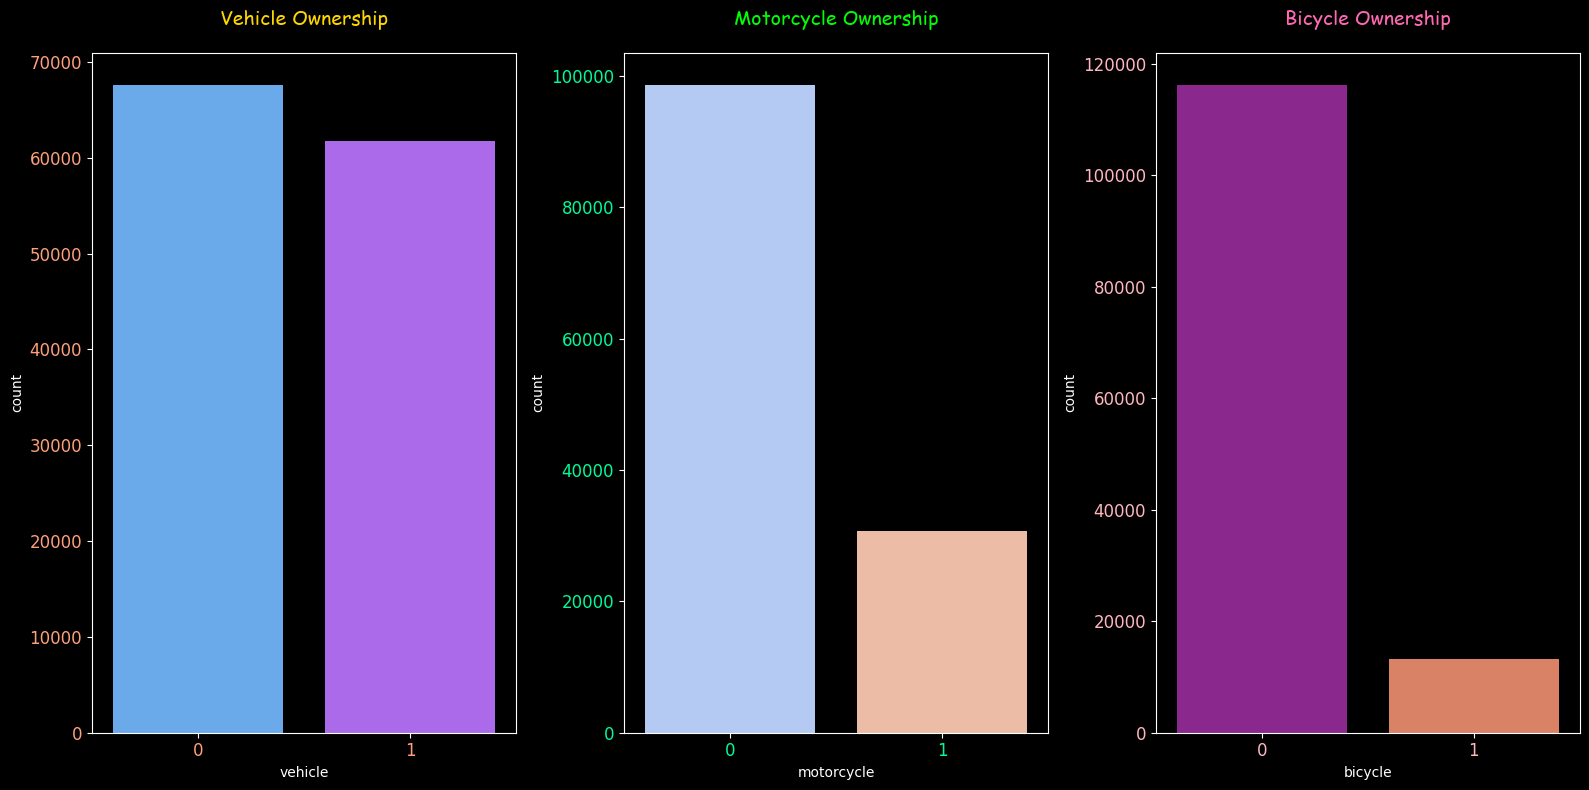

In [83]:

plt.style.use('dark_background')

plt.figure(figsize=(16, 8))

# Vehicle
plt.subplot(1, 3, 1)
sns.countplot(x='vehicle', data=df_ML, palette='cool', hue='vehicle', legend=False)
plt.title('Vehicle Ownership', fontsize=14, color='#FFD700', fontfamily='cursive', pad=20)
plt.xticks(fontsize=12, color='#FFA07A')
plt.yticks(fontsize=12, color='#FFA07A')

# Motorcycle
plt.subplot(1, 3, 2)
sns.countplot(x='motorcycle', data=df_ML, palette='coolwarm', hue='motorcycle', legend=False)
plt.title('Motorcycle Ownership', fontsize=14, color='#00FF00', fontfamily='cursive', pad=20)
plt.xticks(fontsize=12, color='#00FA9A')
plt.yticks(fontsize=12, color='#00FA9A')

# Bicycle
plt.subplot(1, 3, 3)
sns.countplot(x='bicycle', data=df_ML, palette='plasma', hue='bicycle', legend=False)
plt.title('Bicycle Ownership', fontsize=14, color='#FF69B4', fontfamily='cursive', pad=20)
plt.xticks(fontsize=12, color='#FFB6C1')
plt.yticks(fontsize=12, color='#FFB6C1')

plt.tight_layout()
plt.show()

In [84]:
vehicle_count = df_ML[df_ML['vehicle'] == 1].shape[0]
print(f"Number of families that own a vehicle: {vehicle_count}")

motorcycle_count = df_ML[df_ML['motorcycle'] == 1].shape[0]
print(f"Number of families that own a motorcycle: {motorcycle_count}")

bicycle_count = df_ML[df_ML['bicycle'] == 1].shape[0]
print(f"Number of families that own a bicycle: {bicycle_count}")

Number of families that own a vehicle: 61753
Number of families that own a motorcycle: 30726
Number of families that own a bicycle: 13194


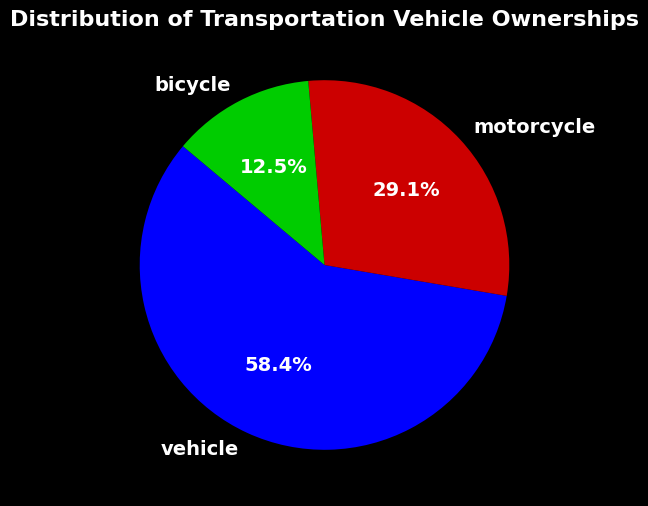

In [85]:
#pie chart
#defining quantity
transportation_counts = {
    'vehicle': vehicle_count,
    'motorcycle': motorcycle_count,
    'bicycle': bicycle_count
}

# Labels and sizes for pie chart
labels = transportation_counts.keys()
sizes = transportation_counts.values()

colors = ['#0000FF', '#CC0000', '#00CC00']

plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, 
                                   textprops={'fontsize': 14, 'fontweight': 'bold'})

# Making the percentage text bold and white
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.title('Distribution of Transportation Vehicle Ownerships', fontsize=16, fontweight='bold')


plt.show()

<div style="direction: rtl; text-align: right; font-family: 'Vazir', sans-serif; background-color: #2c3e50; padding: 20px; border-radius: 8px; box-shadow: 0px 0px 10px rgba(0,0,0,0.3); color: #ecf0f1;">
  <h2 style="color: #f1c40f; text-align: center;"> تحلیل توزیع وسیله نقلیه مورد استفاده خانوارها</h2>
  

  
  <ul style="font-size: 16px; line-height: 1.8;">
    <li><strong>خودرو: </strong>تعداد دو گروهی که از خودرو استفاده می‌کنند و نمی‌کنند، تقریبا برابر است.</li>
    <li><strong>موتور:</strong>استفاده از موتور میان خانوار ها کم است. </li>
    <li><strong>دوچرخه:</strong>استفاده از دوچرخه میان خانوار ها بسیار کم است. </li>
  </ul>
  <h3 style="color: #2ecc71;">تحلیل کلی:</h3>
  
  <p style="font-size: 16px; line-height: 1.6;">
    خانوار ها به صورت عمده صاحب خودرو نیستند ولی با توجه به تعداد خانوارهای صاحب خودرو (61753 خانوار)، نسبت به مالکیت موتور(30726 خانوار) و دوچرخه (13194 خانوار)، می‌توان گفت بیشترین مالکیت وسیله نقلیه میان خانوارها به مالکیت خودرو تعلق دارد. 
  </p>




In [86]:
#dropping unwanted cols

df_ML=df_ML[['Address', 'vehicle', 'motorcycle', 'bicycle', 'year', 'income', 'cost',
       'trans_cost', 'real_income', 'real_cost', 'real_trans_cost']]

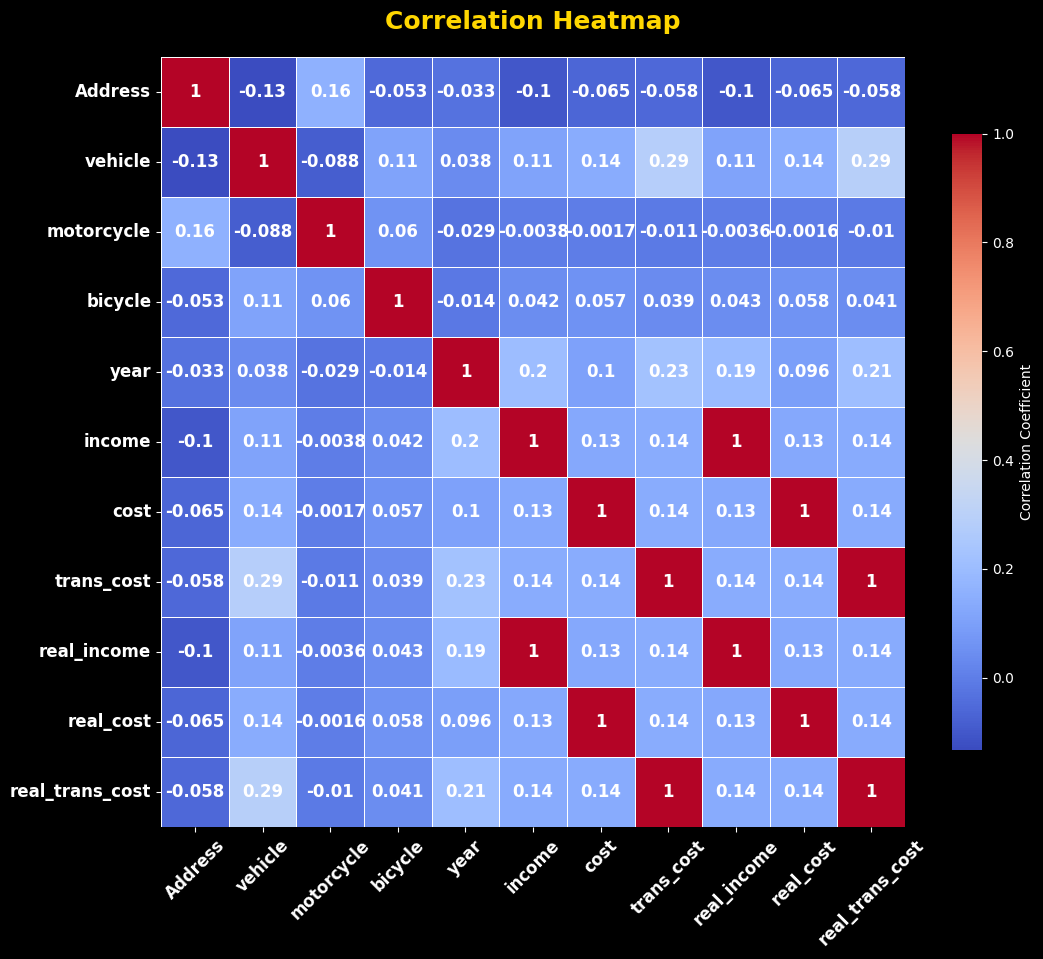

In [87]:


# Calculating correlation matrix
corr_matrix = df_ML.corr()

# dark backg
plt.style.use('dark_background')
plt.figure(figsize=(12, 10))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='white',
            cbar_kws={"shrink": .8, 'label': 'Correlation Coefficient'},
            annot_kws={"size": 12, "weight": "bold", "color": "#FFFFFF"})

plt.title('Correlation Heatmap', fontsize=18, color='#FFD700', weight='bold', pad=20)
plt.xticks(fontsize=12, color='#FFFFFF', weight='bold', rotation=45)
plt.yticks(fontsize=12, color='#FFFFFF', weight='bold')

plt.show()


<div style="direction: rtl; text-align: right; font-family: 'Vazir', sans-serif; background-color: #2c3e50; padding: 20px; border-radius: 8px; box-shadow: 0px 0px 10px rgba(0,0,0,0.3); color: #ecf0f1;">
  <h2 style="color: #f1c40f; text-align: center;"> تحلیل ماتریس همبستگی</h2>
  

  <h3 style="color: #2ecc71;">تحلیل کلی:</h3>
  
  <p style="font-size: 16px; line-height: 1.6;">
  بدیهی است که تمام مقادیر پولی اسمی با مقادیر حقیقی خود همبستگی کامل دارند.
    </p>
  <p style="font-size: 16px; line-height: 1.6;">
بعضی از همبستگی ها مربوط به انواع درآمد و سال است که نمایانگر افزایش یا کاهش درآمد طبق سال هاست.
    </p>
      <p style="font-size: 16px; line-height: 1.6;">
      همچنین مالکیت خودرو با میزان هزینه حمل‌و‌نقل همبستگی دارد که بیانگر هزینه های مشخض خودرو است.





In [88]:
df_ML

,Address,vehicle,motorcycle,bicycle,year,income,cost,trans_cost,real_income,real_cost,real_trans_cost
0,20003386609,0,0,1,1398,2.670000e+08,6.875200e+07,500000,6.480583e+06,1.668738e+06,12135.922330
1,20010394214,1,1,1,1398,1.448200e+09,1.921962e+08,2850000,3.515049e+07,4.664955e+06,69174.757282
2,20003387007,0,0,0,1398,6.760000e+07,3.683316e+07,1000000,1.640777e+06,8.940088e+05,24271.844660
3,20007392616,1,0,0,1398,1.800000e+08,8.704000e+07,1600000,4.368932e+06,2.112621e+06,38834.951456
4,20006390223,0,1,0,1398,3.216000e+08,4.056390e+08,200000,7.805825e+06,9.845607e+06,4854.368932
...,...,...,...,...,...,...,...,...,...,...,...
129336,13001373136,1,0,0,1401,5.230000e+09,1.293727e+09,9500000,1.124731e+08,2.782209e+07,204301.075269
129337,13001373138,1,0,0,1401,1.763980e+09,4.092450e+08,5200000,3.793505e+07,8.800968e+06,111827.956989
129338,13001370341,0,0,0,1401,1.897520e+09,1.559038e+08,4500000,4.080688e+07,3.352770e+06,96774.193548
129339,22104612941,0,0,0,1401,1.450200e+08,1.005710e+08,1000000,3.118710e+06,2.162817e+06,21505.376344
